In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

from itertools import product
from sklearn.metrics import silhouette_score
%load_ext cuml.accel

[2025-04-15 12:35:40.626] [CUML] [info] cuML: Installed accelerator for sklearn.
[2025-04-15 12:36:08.027] [CUML] [info] cuML: Installed accelerator for umap.
[2025-04-15 12:36:08.106] [CUML] [info] cuML: Installed accelerator for hdbscan.
[2025-04-15 12:36:08.106] [CUML] [info] cuML: Successfully initialized accelerator.


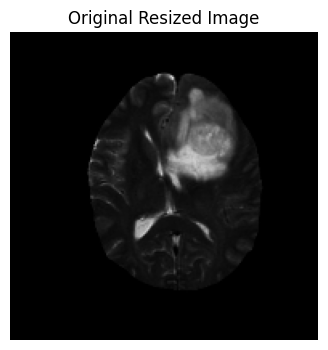

In [ ]:
#https://github.com/mujahidashraf/data/blob/main/t1.jpg
img = cv2.imread('t1.jpg')
#img = cv2.imread('red.PNG')
#img = cv2.imread('t2.png')
img_resized = cv2.resize(img, (192, 192))
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
#img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(4, 4))
plt.imshow(img_rgb)
plt.title("Original Resized Image")
plt.axis('off')
plt.show()


In [ ]:

pixels = img_rgb.reshape((-1, 3)) #/ 255.0  # Normalize


In [ ]:
#db = DBSCAN(eps=0.6, min_samples=30, metric='euclidean')
db = DBSCAN(eps=0.6, min_samples=30, metric='euclidean')  # tweak as needed
labels = db.fit_predict(pixels)

segmented_labels = labels.reshape((img_rgb.shape[:2]))
segmented_labels1 = labels.reshape((img_rgb.shape[:2]))


In [ ]:

unique_labels = np.unique(labels)
print(f"Found {len(unique_labels) - (1 if -1 in unique_labels else 0)} clusters.")




Found 60 clusters.


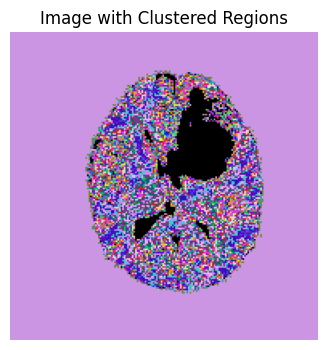

In [ ]:
colored_clusters = np.zeros_like(img_rgb)

# Assign random colors to each cluster
for label in unique_labels:
    if label == -1:
        continue  # Skip noise
    else:
      color = np.random.rand(1, 3)  # Random RGB color
      colored_clusters[segmented_labels == label] = (color * 255).astype(np.uint8)

plt.figure(figsize=(4, 4))
plt.imshow(colored_clusters)
plt.title("Image with Clustered Regions")
plt.axis('off')
plt.show()

Showing cluster -1 with size 1992


<ipython-input-29-06f8f783ded8>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', n_clusters)


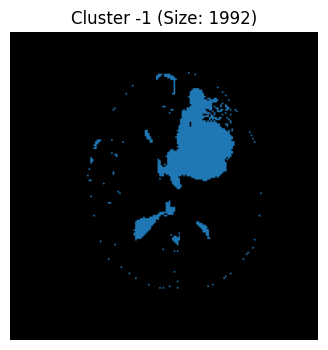

Showing cluster 0 with size 24932


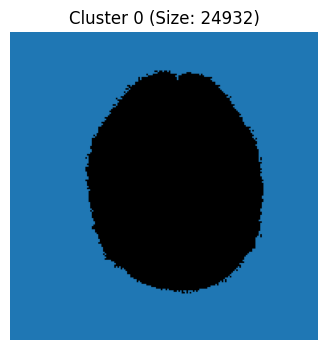

Showing cluster 1 with size 183


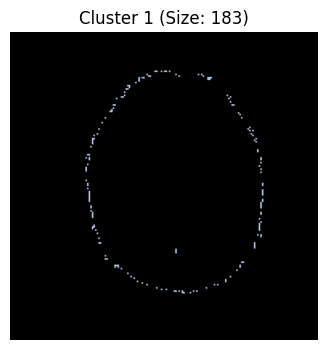

Showing cluster 4 with size 659


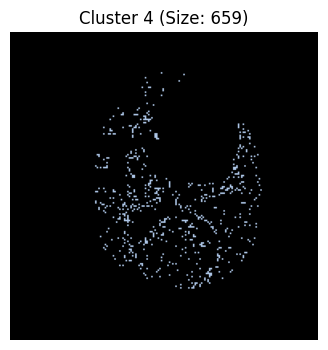

Showing cluster 5 with size 425


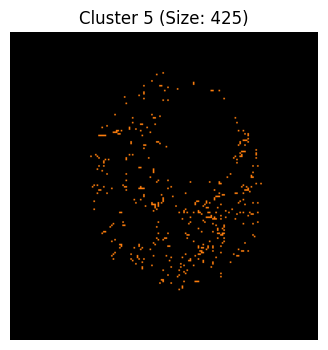

Showing cluster 6 with size 287


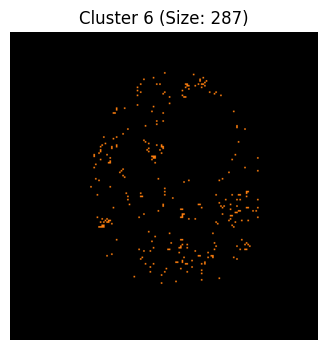

Showing cluster 7 with size 459


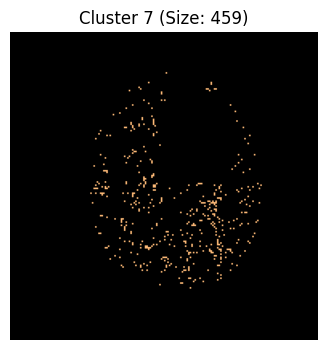

Showing cluster 11 with size 130


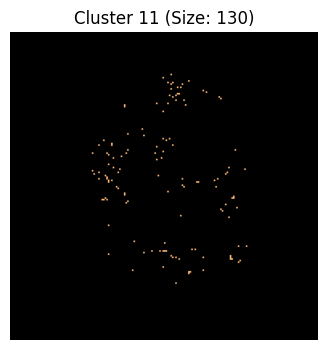

Showing cluster 12 with size 58


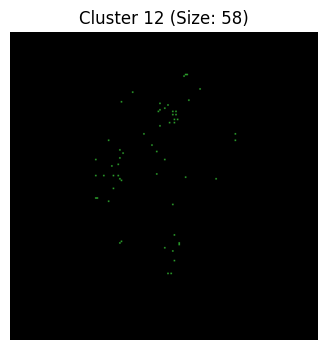

Showing cluster 15 with size 106


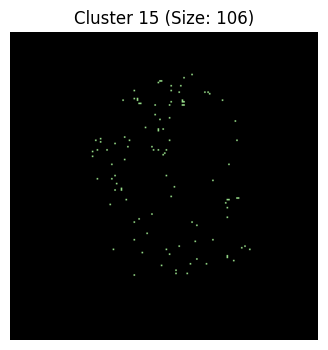

Showing cluster 16 with size 282


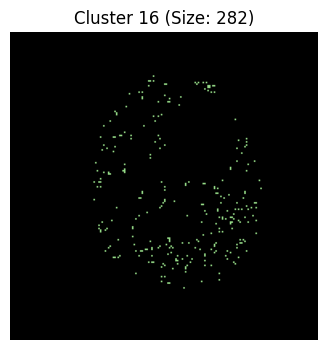

Showing cluster 19 with size 288


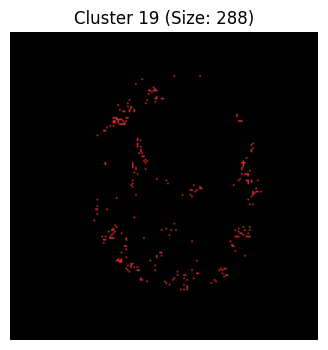

Showing cluster 20 with size 87


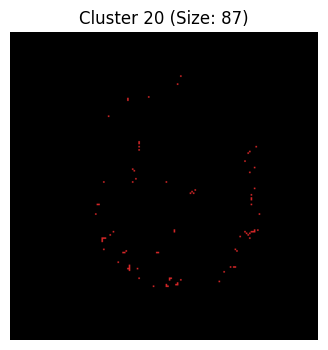

Showing cluster 21 with size 165


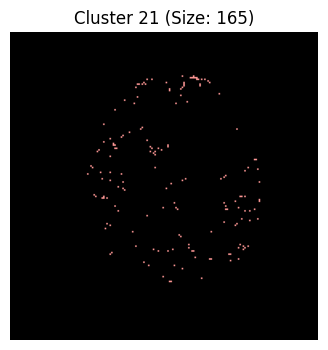

Showing cluster 22 with size 75


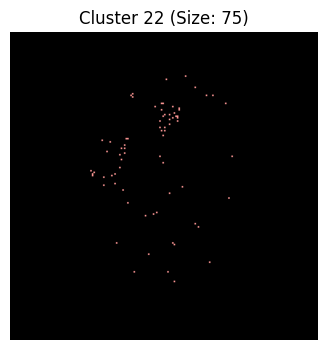

Showing cluster 23 with size 64


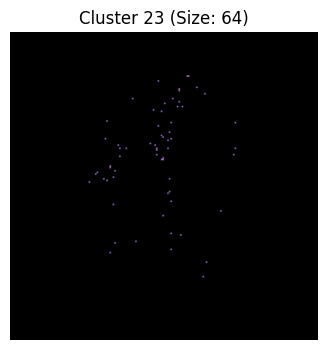

Showing cluster 24 with size 82


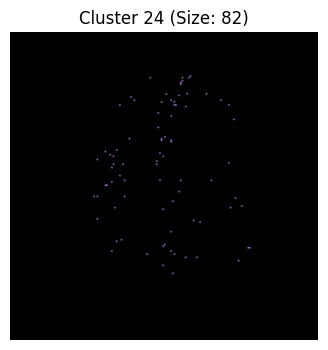

Showing cluster 25 with size 146


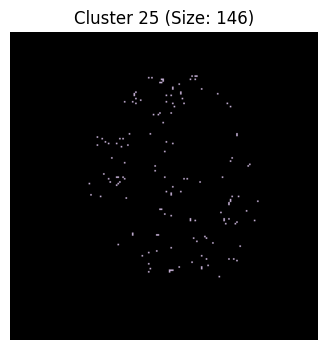

Showing cluster 26 with size 310


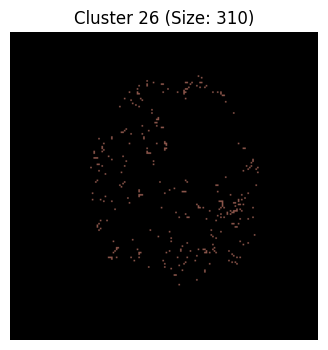

Showing cluster 27 with size 209


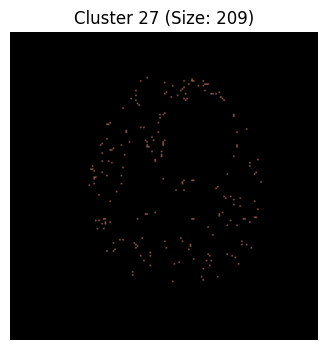

Showing cluster 29 with size 90


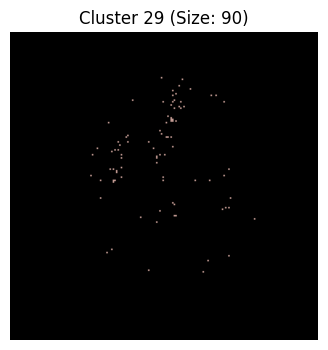

Showing cluster 30 with size 65


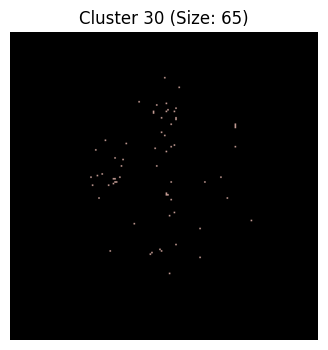

Showing cluster 32 with size 352


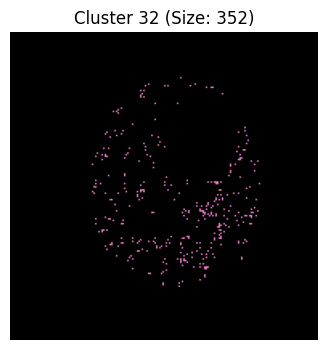

Showing cluster 33 with size 94


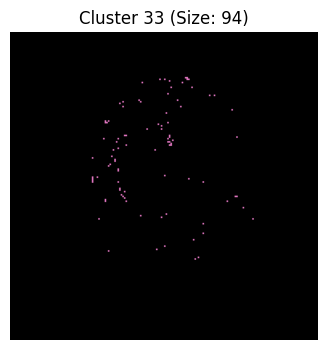

Showing cluster 34 with size 151


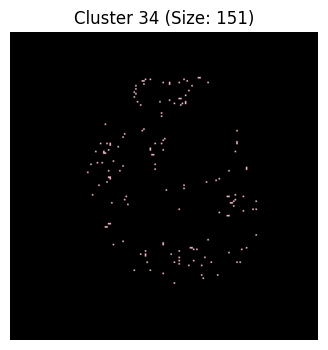

Showing cluster 35 with size 142


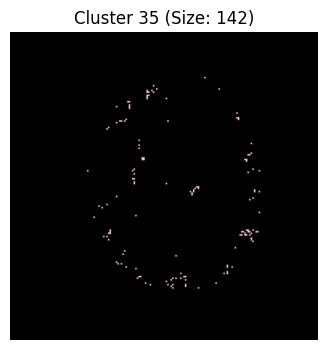

Showing cluster 36 with size 129


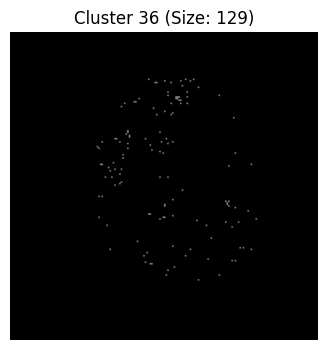

Showing cluster 37 with size 221


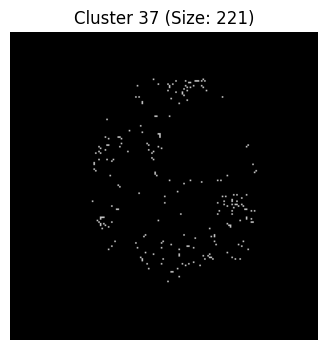

Showing cluster 38 with size 55


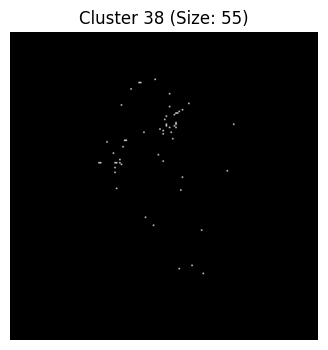

Showing cluster 40 with size 334


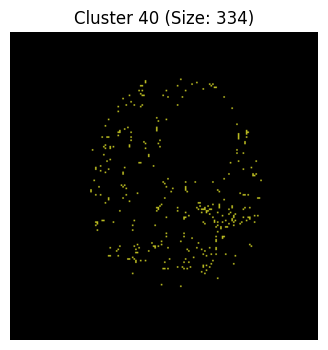

Showing cluster 41 with size 795


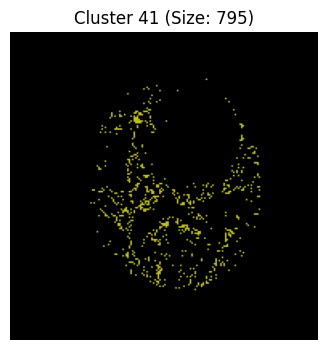

Showing cluster 42 with size 81


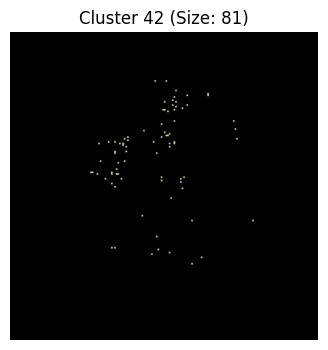

Showing cluster 44 with size 59


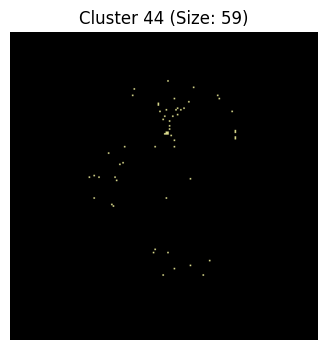

Showing cluster 47 with size 669


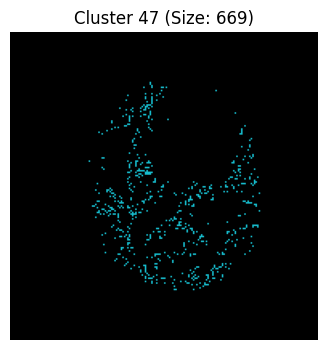

Showing cluster 48 with size 617


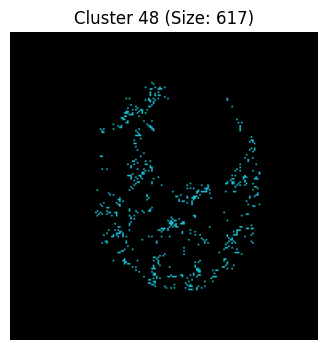

Showing cluster 50 with size 528


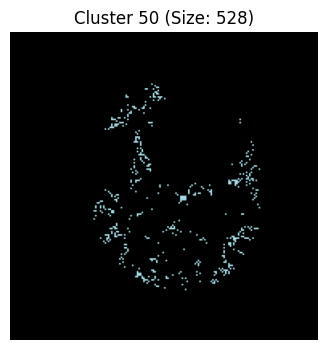

Showing cluster 51 with size 640


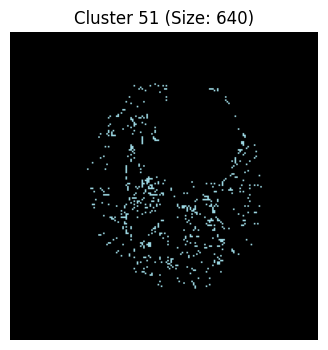

In [ ]:
min_cluster_size = 50

# Create color mapping
def generate_cluster_colors(n_clusters):
    cmap = plt.cm.get_cmap('tab20', n_clusters)
    return {i: tuple((np.array(cmap(i)[:3]) * 255).astype(np.uint8)) for i in range(n_clusters)}

# Count pixels in each cluster
unique_labels, counts = np.unique(segmented_labels, return_counts=True)
cluster_sizes = dict(zip(unique_labels, counts))

# Generate colors for valid clusters
valid_labels = [label for label in unique_labels if  cluster_sizes[label] >= min_cluster_size]
label_to_color = generate_cluster_colors(len(valid_labels))
label_map = dict(zip(valid_labels, label_to_color.values()))

# Show mask for big clusters only
for label in valid_labels:
    print(f"Showing cluster {label} with size {cluster_sizes[label]}")

    # Create a color mask image
    color = label_map[label]
    mask = segmented_labels == label
    cluster_mask = np.zeros_like(img_rgb)
    cluster_mask[mask] = color

    # Show the colored mask
    plt.figure(figsize=(4, 4))
    plt.imshow(cluster_mask)
    plt.title(f"Cluster {label} (Size: {cluster_sizes[label]})")
    plt.axis('off')
    plt.show()

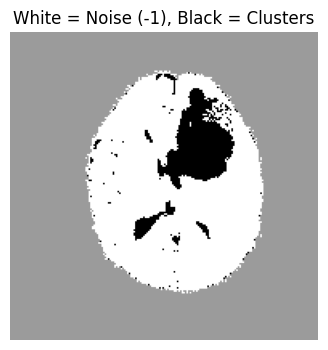

In [ ]:
noise_mask = np.ones_like(segmented_labels1, dtype=np.uint8) * 255  # white

noise_mask[segmented_labels1 == 0]=  155
noise_mask[segmented_labels1 == -1] = 0
#noise_mask = np.ones_like(segmented_labels, dtype=np.uint8) * 255

# Convert to RGB for display (optional, if needed for consistency)
noise_mask_rgb = cv2.cvtColor(noise_mask, cv2.COLOR_GRAY2RGB)

# Show the mask
plt.figure(figsize=(4, 4))
plt.imshow(noise_mask_rgb)
plt.title("White = Noise (-1), Black = Clusters")
plt.axis('off')
plt.show()

In [ ]:

noise_mask = (segmented_labels == -1).astype(np.uint8) * 255  # white = noise

num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(noise_mask, connectivity=8)

areas = stats[1:, cv2.CC_STAT_AREA]  # Skip background
areas

array([   1,    9,   29,    1,    1, 1576,    1,    1,    1,    1,    1,
          3,    8,    2,    2,    9,    2,    2,    1,    1,    1,    1,
          4,    3,   20,    2,    1,    1,   13,    1,    1,    1,    1,
          1,    3,    6,    1,    2,    1,    1,    2,    1,    2,    1,
          1,  182,    2,    1,    1,   35,    1,    1,   19,    1,    1,
          1,    1,    1,    1,    1,    2,    1,    1,    1,    1,    1,
          1,    1,    2,    1,    1,    1,    1,    1,    1,    1,    1],
      dtype=int32)

In [ ]:
top3_indices = np.argsort(areas)[-3:] + 1  # Add 1 because we skipped label 0
top3_indices

array([50, 46,  6])

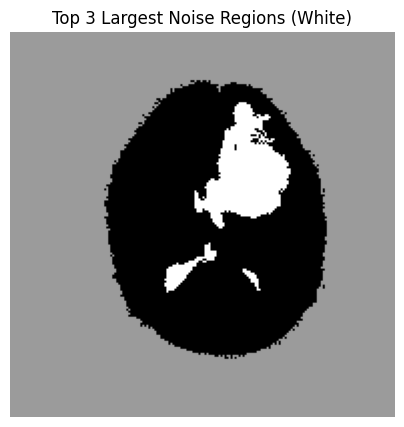

In [ ]:

top3_mask = np.zeros_like(noise_mask)
for idx in top3_indices:
    top3_mask[labels == idx] = 255  # white


top3_mask[segmented_labels1 == 0]=  155
top3_mask_rgb = cv2.cvtColor(top3_mask, cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(top3_mask_rgb)
plt.title("Top 3 Largest Noise Regions (White)")
plt.axis('off')
plt.show()